<a href="https://colab.research.google.com/github/MahimaJones/MahimaJones/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import tensorflow as tf

import keras

#Loading Data
0-White Color ; 
255 - Black Color

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape ,"***",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","AnkleBoot"]
'''
0 => T-shirt/Top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => AnkleBoot
'''

'\n0 => T-shirt/Top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => AnkleBoot\n'

#Show Image

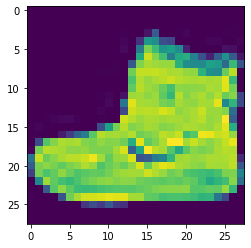

In [ ]:
plt.imshow(X_train[0])

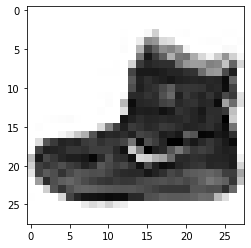

In [ ]:
plt.imshow(X_train[0],cmap="Greys")

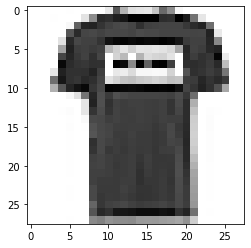

In [ ]:
plt.imshow(X_train[1],cmap="Greys")

In [ ]:
y_train[1]

0

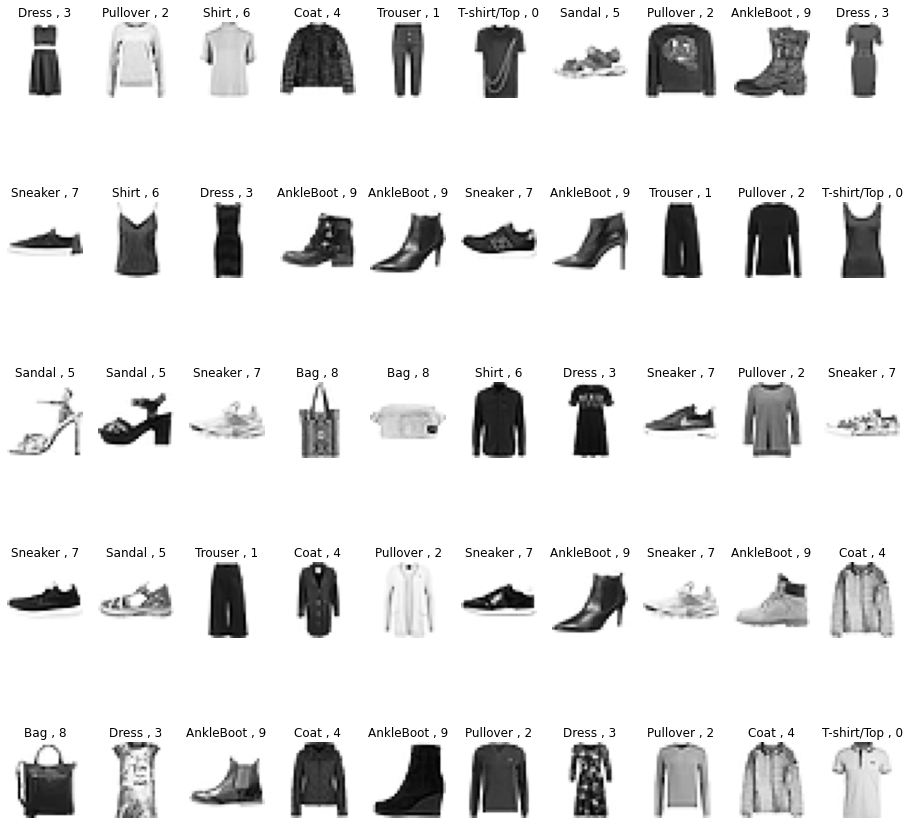

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0 , 1000 , 50):
  plt.subplot(5 , 10 , j); j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis("off")
  plt.title("{} , {}".format(class_labels[y_train[i]],y_train[i]))

#Change Dimension

In [ ]:
X_train.ndim

3

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = np.expand_dims(X_train , -1)
X_test = np.expand_dims(X_test , -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train.shape

(60000, 28, 28, 1)

#Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

#Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape , y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_val.shape , y_val.shape

((12000, 28, 28, 1), (12000,))

#Convolutional Neural Network - Model Building

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 13s 14ms/step - loss: 0.6407 - accuracy: 0.7812 - val_loss: 0.4327 - val_accuracy: 0.8486
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3870 - accuracy: 0.8654 - val_loss: 0.3706 - val_accuracy: 0.8733
Epoch 3/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3410 - accuracy: 0.8806 - val_loss: 0.3606 - val_accuracy: 0.8738
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3089 - accuracy: 0.8918 - val_loss: 0.3452 - val_accuracy: 0.8783
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2921 - accuracy: 0.8956 - val_loss: 0.3080 - val_accuracy: 0.8930
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2671 - accuracy: 0.9059 - val_loss: 0.2994 - val_accuracy: 0.8954
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2566 - accuracy: 0.9095 - val_loss: 0.2879 - val_accuracy: 0.9006
Epoch 8/10
94/94 [

#Test and Evaluate Model

In [ ]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2788 - accuracy: 0.8968


[0.2787894606590271, 0.8967999815940857]

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
      dtype=float32)

In [ ]:
np.argmax(y_pred[0].round(2))

9

In [ ]:
y_test[0]

9

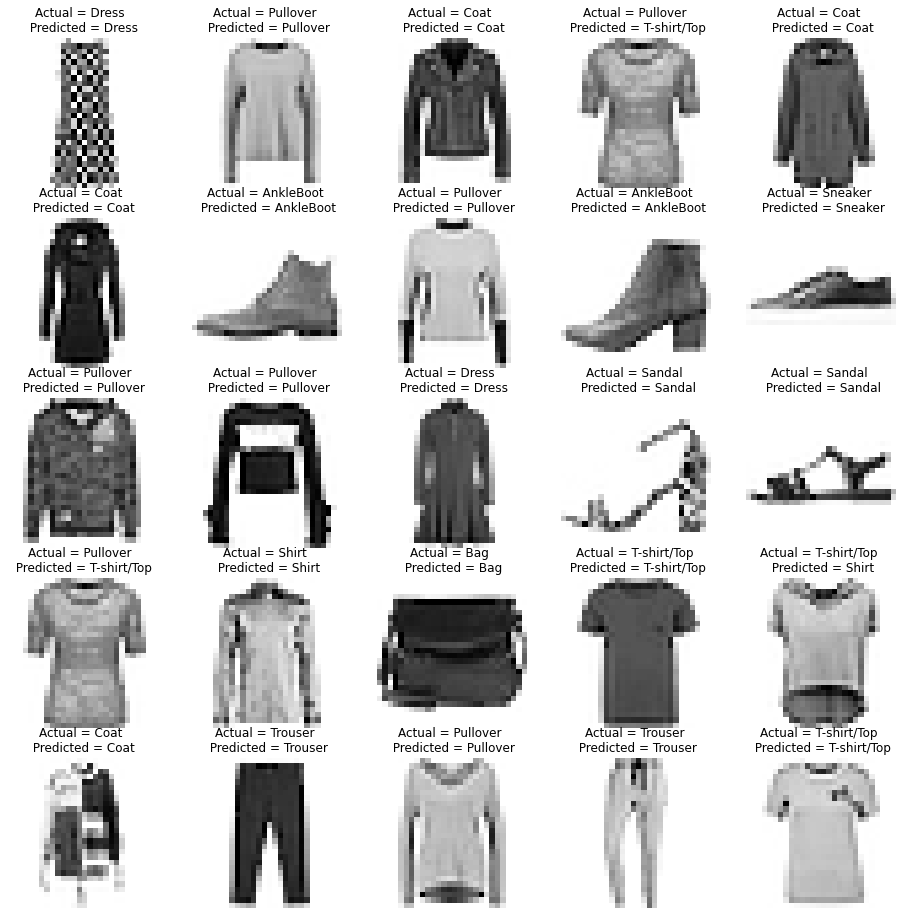

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0 , 1000 , 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
  plt.axis("off")
  plt.title("Actual = {} \n Predicted = {}".format(class_labels[y_test[i]],class_labels[np.argmax(y_pred[i])]))

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , [ np.argmax(i) for i in y_pred])

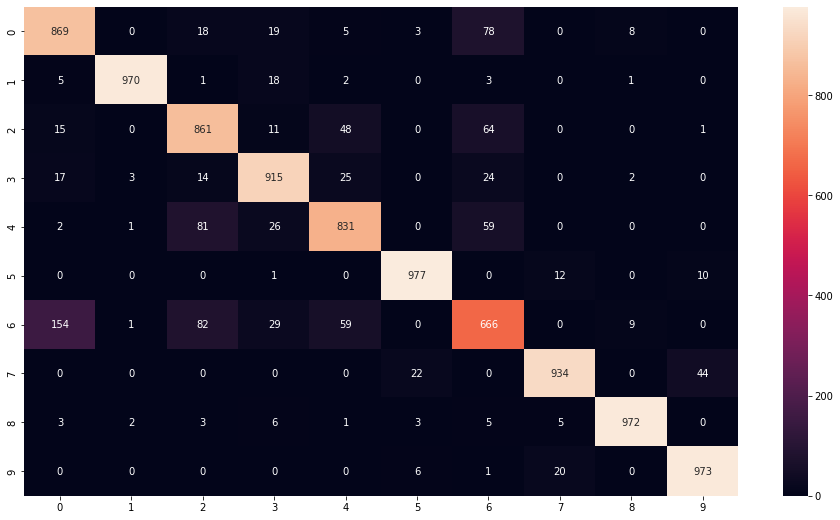

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(cm , annot=True , fmt="d")

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,[np.argmax(i) for i in y_pred], target_names=class_labels)

In [ ]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/Top       0.82      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.86      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.86      0.83      0.84      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.74      0.67      0.70      1000
     Sneaker       0.96      0.93      0.95      1000
         Bag       0.98      0.97      0.98      1000
   AnkleBoot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
model.save("MNIST_classifier_nn_model.h5")

#Build 2 Complex CNN

In [ ]:
#Building the model
cnn_model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])
#Compile the Model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train,y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_val, y_val))

cnn_model2.save("Fashion_MNIST_cnn_model2.h5")

"""##very complex model##"""

#Building the model
cnn_model3=keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=56,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10,activation='softmax')
])

#Compile the Model
cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the Model
cnn_model3.fit(X_train,y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_val, y_val))

cnn_model3.save("Fashion_MNIST_cnn_model3.h5")

cnn_model3.evaluate(X_test,y_test)

Epoch 1/20
94/94 [==============================] - 2s 14ms/step - loss: 1.0490 - accuracy: 0.6081 - val_loss: 0.6004 - val_accuracy: 0.7727
Epoch 2/20
94/94 [==============================] - 1s 10ms/step - loss: 0.5578 - accuracy: 0.7915 - val_loss: 0.4630 - val_accuracy: 0.8268
Epoch 3/20
94/94 [==============================] - 1s 11ms/step - loss: 0.4554 - accuracy: 0.8328 - val_loss: 0.3951 - val_accuracy: 0.8526
Epoch 4/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3976 - accuracy: 0.8564 - val_loss: 0.3660 - val_accuracy: 0.8652
Epoch 5/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3641 - accuracy: 0.8683 - val_loss: 0.3380 - val_accuracy: 0.8751
Epoch 6/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3347 - accuracy: 0.8771 - val_loss: 0.3233 - val_accuracy: 0.8814
Epoch 7/20
94/94 [==============================] - 1s 10ms/step - loss: 0.3182 - accuracy: 0.8835 - val_loss: 0.3222 - val_accuracy: 0.8800
Epoch 8/20
94

[0.5253051519393921, 0.9065999984741211]